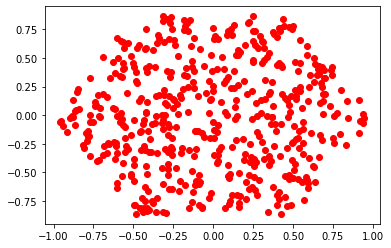

In [65]:
from math import sqrt
from random import randrange, random
from matplotlib import pyplot
import numpy as np

vectors = [(-1.,0),(.5,sqrt(3.)/2.),(.5,-sqrt(3.)/2.)]

def randinunithex():
    x = randrange(3);
    (v1,v2) = (vectors[x], vectors[(x+1)%3])
    (x,y) = (random(),random())
    return (x*v1[0]+y*v2[0],x*v1[1]+y*v2[1])

for n in range(500):
    v = randinunithex()
    pyplot.plot([v[0]],[v[1]],'ro')

pyplot.show()

In [17]:
def parametric_hexagon(s, npoints):
    theta = np.random.uniform(low=0, high=2*np.pi, size=npoints)
    r = np.random.uniform(low=0, high=s, size=npoints)
    
    x = r*np.cos(theta)*np.cos(np.pi/6)/(np.cos((np.pi/3)*(3*theta/np.pi - np.ceil(3*theta/np.pi)) - np.pi/6))
    y = r*np.sin(theta)*np.cos(np.pi/6)/(np.cos((np.pi/3)*(3*theta/np.pi - np.ceil(3*theta/np.pi)) - np.pi/6))
    
    return x, y
    

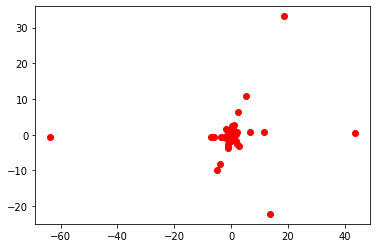

In [18]:
x, y = parametric_hexagon(1, 100)
pyplot.plot(x,y,'ro')

In [20]:
.5,sqrt(3.)/2.

(0.5, 0.8660254037844386)

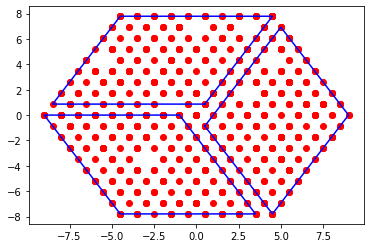

In [27]:
size = 10

vectors = [(-1.,0),(.5,sqrt(3.)/2.),(.5,-sqrt(3.)/2.)]

def randinunithex():
    if not randrange(3*size*size+1): return (0,0)
    t = randrange(3);
    (v1,v2) = (vectors[t], vectors[(t+1)%3])
    (x,y) = (randrange(0,size),randrange(0,size))
    return (x*v1[0]+y*v2[0],x*v1[1]+y*v2[1])

# Plot 500 random points in the hexagon
for n in range(1000):
    v = randinunithex()
    pyplot.plot([v[0]],[v[1]],'ro')

# Show the trimmed rhombuses
for t in range(3):
    (v1,v2) = (vectors[t], vectors[(t+1)%3])
    corners = [(0,1),(0,size-1),(size-1,size-1),(size-1,1),(0,1)]
    corners = [(x*v1[0]+y*v2[0],x*v1[1]+y*v2[1]) for (x,y) in corners]
    pyplot.plot([x for (x,y) in corners],[y for (x,y) in corners],'b')

pyplot.show()

In [73]:
def distance(x1, x2):
    x = x1-x2
    d = np.sqrt(sum(x**2))
    return d

def centroid(x1, verts, size):
    x2 = vertices[verts[0]]*size
    x3 = vertices[verts[1]]*size
    
    x = (x1+x2+x3)/3
    return x

In [74]:
from collections import OrderedDict
vertices = OrderedDict()
vertices["A"] = np.array([1,0])
vertices["B"] = np.array([1/2., np.sqrt(3)/2.])
vertices["C"] = np.array([-1/2., np.sqrt(3)/2.])
vertices["D"] = np.array([-1,0])
vertices["E"] = np.array([-1/2., -np.sqrt(3)/2])
vertices["F"] = np.array([1/2, -np.sqrt(3)/2])

In [75]:
keys = ["A", "B", "C", "D", "E", "F"]
adjacent = []
n_keys = len(keys)
for i in range(n_keys):
    for j in range(i+1, n_keys):
        dist = distance(vertices[keys[i]] ,vertices[keys[j]])
        if np.isclose(dist,1):
            adjacent.append((keys[i], keys[j]))

In [47]:
np.isclose(distance(vertices['A'] ,vertices['B']), 1)

True

In [58]:
adjacent

[('A', 'B'), ('A', 'F'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F')]

In [77]:
def hexagon_generator(size):
    vectors = [(-1.,0),(1/2.,sqrt(3.)/2.),(1/2.,-sqrt(3.)/2.)]
    if not randrange(3*size*size+1): return (0,0)
    t = randrange(3);
    (v1,v2) = (vectors[t], vectors[(t+1)%3])
    (x,y) = (randrange(0,size),randrange(0,size))
    return (x*v1[0]+y*v2[0],x*v1[1]+y*v2[1])

def sample_points(state=None, size=10):
    if type(state) == type(None):
        P = hexagon_generator(size)
    else:
        P = state
    
    verts = adjacent[randrange(len(adjacent))]
    newP = centroid(P, verts, size)
    
    return newP

In [86]:
num = 10000
state = None
points = np.zeros((num, 2))
for i in range(num):
    state = sample_points(state, 20)
    points[i] = state
        

In [79]:
import matplotlib.pyplot as plt

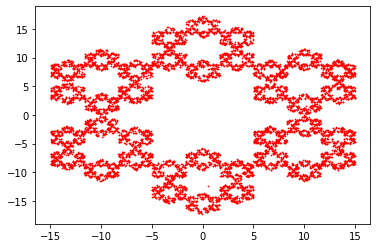

In [87]:
plt.scatter(points[:,0], points[:,1], s=0.5, c='r')
plt.show()

In [81]:
plt.scatter?